In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ItemNotFoundError(Exception):
    """Raised when the specified item is not present in the DataFrame."""

In [12]:
def plot_price_cost_margin(
    grouped_items: pd.DataFrame,
    item_name: str,
    date_col: str = "Month",
    price_col: str = "avg_unit_price",
    cost_col: str = "avg_unit_cost",
) -> None:
    """
    Plot sales price, cost per unit, margin percentage, and margin trend
    for a given item from a grouped DataFrame.

    Args:
        grouped_items (pd.DataFrame): DataFrame containing item-level metrics.
        item_name (str): Name of the item to plot.
        date_col (str): Name of the column containing date or period values.
        price_col (str): Name of the column containing average price values.
        cost_col (str): Name of the column containing average cost values.

    Raises:
        ItemNotFoundError: If the specified item_name is not in grouped_items.
    """
    # -- color definitions (edit here to change palette) --
    bar_color_price       = "#9FC5E8"  # sales price bars
    bar_color_cost        = "#CACAD3"  # cost per unit bars
    line_color_margin     = "#2ca02c"  # margin % line
    line_color_trend      = "#674EA7"  # linear margin % dashed line

    # Filter for the requested item
    df = grouped_items.xs(item_name, level="Item", drop_level=False).copy()
    if df.empty:
        raise ItemNotFoundError(f"Item '{item_name}' not found in DataFrame.")

    # Prepare x-axis positions
    x = np.arange(len(df))
    width = 0.35  # bar width

    # Create figure and primary axis for price/cost bars
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(x - width/2, df[price_col], width, label="Unit Price", color=bar_color_price)
    ax1.bar(x + width/2, df[cost_col], width, label="Unit Cost", color=bar_color_cost)
    ax1.set_xlabel("Month", fontweight="bold")
    ax1.set_ylabel("Price/Cost (US$)", fontweight="bold")
    ax1.set_title(item_name, fontweight="bold")
    ax1.set_xticks(x)
    dates = df.index.get_level_values(date_col)
    ax1.set_xticklabels(dates.strftime("%Y-%m"), rotation=45)
    ax1.legend(loc="lower left")

    # Secondary axis for margin percentage
    ax2 = ax1.twinx()
    ax2.plot(x, df["gross_unit_margin_pct"], marker="o", label="Margin %", color=line_color_margin)
    ax2.set_ylabel("Margin %", fontweight="bold")

    # Force the y-axis to start at zero
    ax2.set_ylim(bottom=0)

    # Fit and plot linear trend line for margin
    coeffs = np.polyfit(x, df["gross_unit_margin_pct"], deg=1)
    trend = np.poly1d(coeffs)
    ax2.plot(x, trend(x), linestyle="--", label="Linear (Margin %)", color=line_color_trend)
    ax2.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

In [6]:
grouped_items = pd.read_parquet('unit_margin_analysis.parquet')

In [16]:
grouped_items.columns

Index(['Description', 'Beginning Inv Qty On-hand', 'Beginning Average Cost',
       'Beginning Inv On-hand Value', 'Receipts', 'Other Inv Inputs',
       'Total Input Quantity', 'Value of Inputs', 'Last Receipt Date', 'Sales',
       'Other Inventory Outputs', 'Total Output Quantity', 'Value of Outputs',
       'LAST SALES DATE', 'Ending Inv On-hand Value', 'Ending Average Cost',
       'Inventory Change', 'level_1_category', 'level_2_category',
       'level_3_category', 'level_4_category', 'level_5_category',
       'level_6_category', 'manufacturer', 'total_quantity', 'total_sales',
       'num_invoice_lines', 'avg_unit_price', 'avg_unit_cost',
       'gross_unit_margin', 'gross_unit_margin_pct'],
      dtype='object')

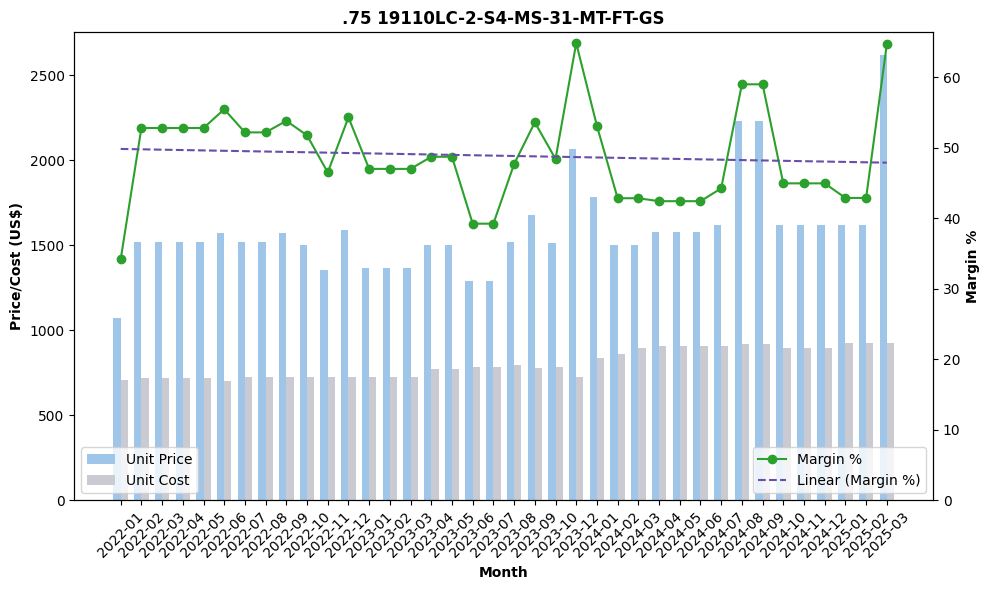

In [15]:
# Example usage:
plot_price_cost_margin(grouped_items, ".75 19110LC-2-S4-MS-31-MT-FT-GS")